In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.rcParams['figure.figsize'] = (7,5)
# plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='viridis')
%matplotlib inline

In [2]:
df=pd.read_csv('anime.csv')
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


## Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
# changing dtype
df['episodes']=pd.to_numeric(df['episodes'], errors='coerce')

In [5]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes    340
rating      230
members       0
dtype: int64

In [6]:
# Filling null values
df['genre'].fillna(df['genre'].mode()[0],inplace=True)
df['type'].fillna(df.type.mode()[0],inplace=True)
df['rating'].fillna(df.rating.mean(),inplace=True)
df['episodes'].fillna(df['episodes'].mean(),inplace=True)

In [7]:
df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes    float64
rating      float64
members       int64
dtype: object

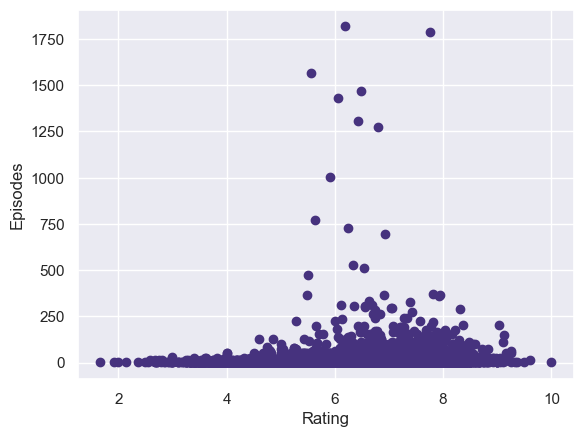

In [8]:
plt.scatter(y='episodes',x='rating',data=df)
plt.xlabel('Rating')
plt.ylabel('Episodes')
plt.show()

<Axes: xlabel='count', ylabel='type'>

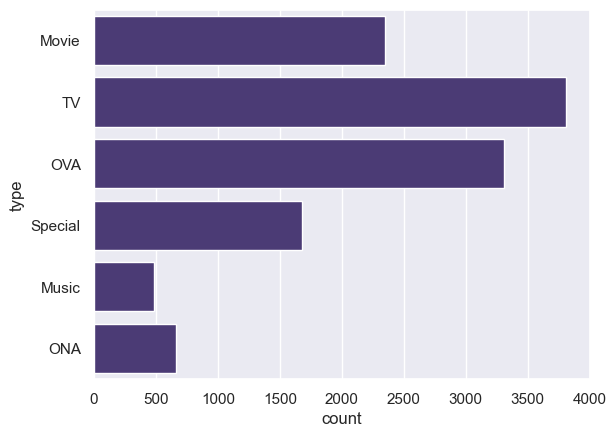

In [9]:
sns.countplot(y='type',data=df)

<Axes: ylabel='Frequency'>

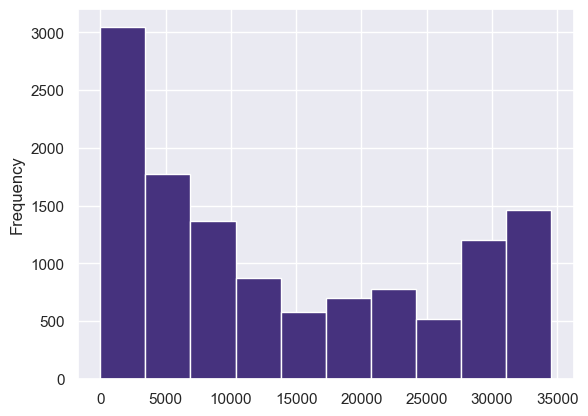

In [10]:
df['anime_id'].plot(kind='hist')

In [11]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1.0,4.15,211
12290,5543,Under World,Hentai,OVA,1.0,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4.0,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1.0,4.98,175


In [46]:
len(df.genre.unique())

3264

## Getting tfidf vectors from genre column

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words="english")
tf_mat=tfidf.fit_transform(df['genre'])

In [41]:
tf_mat.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.29464923, 0.31760665, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25063144, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [44]:
pd.DataFrame(tf_mat.toarray(),columns=tfidf.get_feature_names_out())

,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,...,shounen,slice,space,sports,super,supernatural,thriller,vampire,yaoi,yuri
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.440247,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.544416,0.000000,0.0,0.0,0.0
1,0.294649,0.317607,0.0,0.0,0.0,0.000000,0.0,0.0,0.335834,0.0,...,0.350987,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.250631,0.000000,0.0,0.0,0.0,0.200766,0.0,0.0,0.000000,0.0,...,0.298553,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.833769,0.0,0.0,0.0
4,0.250631,0.000000,0.0,0.0,0.0,0.200766,0.0,0.0,0.000000,0.0,...,0.298553,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
12290,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
12291,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
12292,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [45]:
tf_mat.shape

(12294, 46)

## Getting similarity for the movies

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix=cosine_similarity(tf_mat,tf_mat)
similarity_matrix

array([[1.        , 0.14784981, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14784981, 1.        , 0.1786367 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.1786367 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [61]:
movie_title='Kimi no Na wa.'

In [66]:
idx=df.loc[df['name']==movie_title].index[0]
idx

0

In [63]:
scores=list(enumerate(similarity_matrix[idx]))
scores

[(0, 1.0),
 (1, 0.14784981007855474),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.4249925473523769),
 (6, 0.0),
 (7, 0.15652491384207465),
 (8, 0.0),
 (9, 0.0),
 (10, 0.60788061615937),
 (11, 0.5637748610865942),
 (12, 0.0),
 (13, 0.1250758715631539),
 (14, 0.4249925473523769),
 (15, 0.6017832880256184),
 (16, 0.6307223006790011),
 (17, 0.19227389166259454),
 (18, 0.0),
 (19, 0.17112656185529276),
 (20, 0.20226447684520188),
 (21, 0.2598324256709115),
 (22, 0.1590966999156851),
 (23, 0.1799871261513333),
 (24, 0.0),
 (25, 0.6150352056494524),
 (26, 0.39045531854791315),
 (27, 0.19227389166259454),
 (28, 0.19227389166259454),
 (29, 0.0),
 (30, 0.4047641258954915),
 (31, 0.389349639583797),
 (32, 0.20226447684520188),
 (33, 0.19227389166259454),
 (34, 0.389349639583797),
 (35, 0.4907420071032434),
 (36, 0.2429273108877298),
 (37, 0.227082773465021),
 (38, 0.10120521936652299),
 (39, 0.504269570068784),
 (40, 0.1753811951427698),
 (41, 0.0),
 (42, 0.3160871439463693),
 (43, 0.4249925473523769

In [58]:
scores=sorted(scores,key=lambda x:x [1],reverse=True)
scores

[(0, 1.0),
 (5805, 1.0),
 (6394, 1.0),
 (1111, 0.955317002606888),
 (1201, 0.8715047911208604),
 (1494, 0.8715047911208604),
 (878, 0.8688302781874043),
 (986, 0.8688302781874043),
 (1604, 0.8688302781874043),
 (1959, 0.8548016834935548),
 (4514, 0.8548016834935548),
 (5031, 0.8548016834935548),
 (5127, 0.8548016834935548),
 (4219, 0.8488877702367621),
 (11061, 0.8488877702367621),
 (208, 0.8388152571159246),
 (504, 0.8388152571159246),
 (1435, 0.8388152571159246),
 (1436, 0.8388152571159246),
 (1631, 0.8388152571159246),
 (1907, 0.8388152571159246),
 (2300, 0.8388152571159246),
 (3297, 0.8388152571159246),
 (3530, 0.8388152571159246),
 (3908, 0.8388152571159246),
 (3914, 0.8388152571159246),
 (5233, 0.8388152571159246),
 (6156, 0.8388152571159246),
 (6160, 0.8388152571159246),
 (219, 0.7869834616904456),
 (401, 0.7869834616904456),
 (2078, 0.7869834616904456),
 (2724, 0.7869834616904456),
 (5346, 0.7869834616904456),
 (7402, 0.7869834616904456),
 (11082, 0.7869834616904456),
 (4572, 0

In [59]:
movie_i=[tpl[0] for tpl in scores[1:4]]
movie_i

[5805, 6394, 1111]

In [60]:
list(df['name'].iloc[movie_i])

['Wind: A Breath of Heart OVA',
 'Wind: A Breath of Heart (TV)',
 'Aura: Maryuuin Kouga Saigo no Tatakai']

## Function to get similar movies

In [75]:
def similar_movies(movie_title,nr_movies):
    idx=df.loc[df['name']==movie_title].index[0]
    scores=list(enumerate(similarity_matrix[idx]))
    scores=sorted(scores,key=lambda x:x [1],reverse=True)
    movie_i=[tpl[0] for tpl in scores[1:nr_movies+1]]
    movies=[list(df['name'].iloc[movie_i])]
    return movies

In [77]:
similar_movies('Under World',4)

[['ViVid Strike!', 'Metropolis (2009)', 'Match Shoujo', 'Katsudou Shashin']]

# Interview Questions

1. In user based filtering recommedation is completely based on users data like rating,likes,watchtime etc, In content based filtering recommedation is based on content similarities like geners,goegraphical etc

2. In collaborative filtering content is recomended based on similarities of the data. It calculates the similarity between the items and recommend to the relevant users